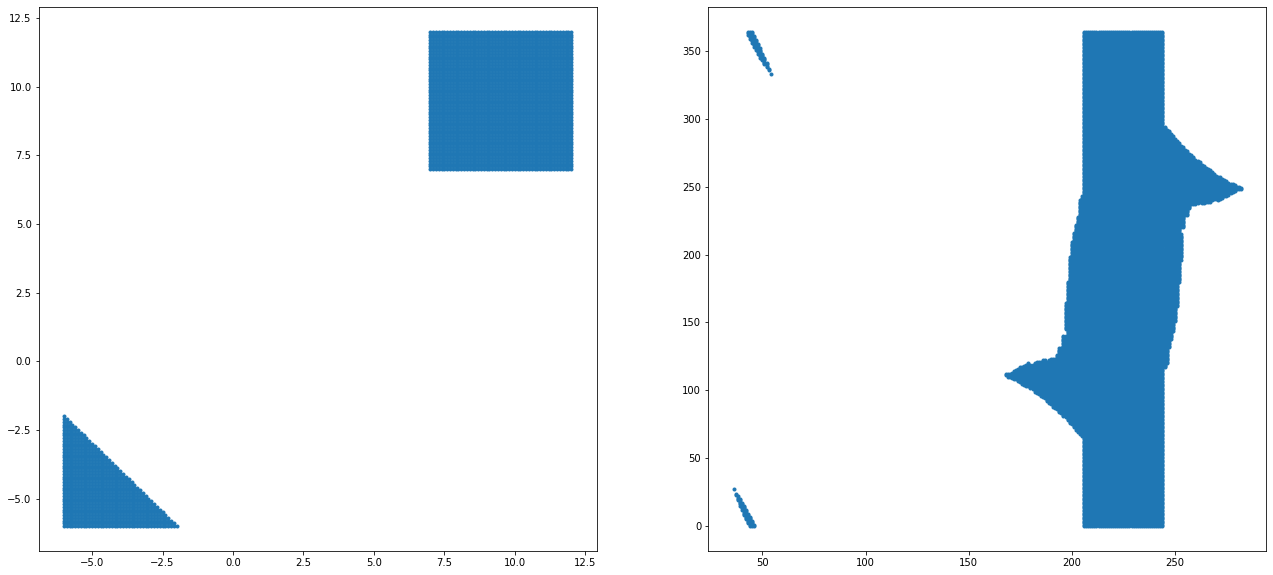

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (22, 10)

## convert degree to radian
def radian( degree ):
    return float(degree)* np.pi / 180.


class environment:
    def __init__(self,object_dot):
        self.object_dots=object_dot

    def collision_check(self,start_dot,middle_dot,end_dot):
        
        ####### arm1 ########
        X1 = ( np.linspace( start_dot[0] , middle_dot[0] , num=10 ) )
        Y1 = []
        ## y - y0 = m ( x-x0 )
        if ( middle_dot[0] - start_dot[0] ) != 0: 
            m1 = ( middle_dot[1] - start_dot[1] ) / ( middle_dot[0] - start_dot[0] ) 
            for x in X1: 
                Y1.append(  m1 * ( x -  start_dot[0] ) + start_dot[1] )
        else:
            Y1 += list ( np.linspace( start_dot[1] , middle_dot[1] , 10 ) )
        ####### arm2 ########
        X2= ( np.linspace( middle_dot[0] , end_dot[0] , num=10 ) )
        Y2=[]
        ## y - y0 = m ( x-x0 ) 
        if  ( end_dot[0] - middle_dot[0] ) != 0:
            m2 = ( end_dot[1] - middle_dot[1] ) / ( end_dot[0] - middle_dot[0] ) 
            for x in X2: 
                Y2.append(  m2 * ( x -  middle_dot[0] ) + middle_dot[1] )
        else:
            Y2 += list( np.linspace( middle_dot[1] , end_dot[1] , 10 ))

        for i in range(len(X1)):
            if [ round( X1[i] , 1 ), round( Y1[i] , 1 ) ] in self.object_dots: 
                return True
        for i in range(len(X2)):
            if [ round( X2[i] , 1 ), round( Y2[i] , 1 ) ] in self.object_dots: 
                return True    
        else:
            return False

# arms lenght
arm1_len= 6.7
arm2_len=3.4


######### objects ##########

objects = []
for x in np.arange( 7.0 , 12.1 , 0.1 ):
    for y in np.arange( 7.0 , 12.1 , 0.1) :
        objects.append( [ round(x,1) , round(y,1) ] )

ystart = -2.0
for x in (np.arange( -6.0 , -1.9 , 0.1)):  
    for y in (np.arange ( ystart , -6.1 , -0.1 )): 
        objects.append([round(x,1),round(y,1)])
    ystart += -0.1
    ystart = round(ystart,1)

plt.subplot(1,2,1)
objectss= np.array(objects)
plt.plot(objectss.T[0],objectss.T[1], '.')

######### environment #########
env = environment( object_dot = objects )
configuration_collisions=[]

## arm 1 end point
x1 = 0
y1 = 0
## arm2 end point 
x2 = 0
y2 = 0

conf_space_obs=[]
## configuration space
for arm1_degree in range(0,365):
    x1 = np.cos( radian( arm1_degree ) ) * arm1_len
    y1 = np.sin( radian( arm1_degree ) ) * arm1_len
    for arm2_degree in range (0,365):
        x2 = x1 + ( np.cos( radian( arm1_degree + arm2_degree ) ) * arm2_len )
        y2 = y1 + ( np.sin( radian( arm1_degree + arm2_degree ) ) * arm2_len )
        if env.collision_check( [ 0 , 0 ] , [ x1 , y1 ] , [ x2 , y2 ] ):
            conf_space_obs.append( [ arm1_degree , arm2_degree] )

conf_space_obs= np.array(conf_space_obs)

plt.subplot(1,2,2)
plt.plot(conf_space_obs.T[0],conf_space_obs.T[1], '.')

In [30]:
def cofP_2_cspaceP(x,y):
    min_dist= 100
    arms_degree=[]
    for arm1_degree in np.arange( 0 , 365 , 0.1 ):
        x1 = np.cos( radian( arm1_degree ) ) * arm1_len
        y1 = np.sin( radian( arm1_degree ) ) * arm1_len
        for arm2_degree in np.arange( 0 , 365 , 0.1 ):
            x2 = x1 + ( np.cos( radian( arm1_degree + arm2_degree ) ) * arm2_len )
            y2 = y1 + ( np.sin( radian( arm1_degree + arm2_degree ) ) * arm2_len )
            if np.sqrt( ( (x2) - (x) ) ** 2 + ( (y2) - (y) ) ** 2 ) < min_dist :
                arms_degree = [ arm1_degree , arm2_degree ]
                min_dist =  np.sqrt( ( (x2) - (x) ) ** 2 + ( (y2) - (y) ) ** 2 )
    return [ round( arms_degree[ 0 ] , 2 ) , round ( arms_degree[ 1 ] , 2 ) ]

## arm degree at start point 
start_arms_degree = cofP_2_cspaceP( -5 , 6)
print(start_arms_degree)
end_arms_degree = cofP_2_cspaceP( 6 , -6 )
print(end_arms_degree)

## arm degree at end point 

[155.5, 275.7]
[337.1, 290.0]


# save in files

In [49]:
np.savetxt("./start_arms_degree.txt" , np.array(start_arms_degree))
np.savetxt("./end_arms_degree.txt" , np.array(end_arms_degree))
np.savetxt("./cspace_objects.txt" , objectss)
np.savetxt("./conf_space_obs.txt" , conf_space_obs)



## DRAW ARMS FUNC

In [54]:
% auto
def draw_arm( arms_degree ):
    x0 = 0
    y0 = 0
    
    x1 = arm1_len * np.cos( radian (arms_degree[0] ) )
    y1 = arm1_len * np.sin( radian (arms_degree[0] ) )

    x2 = x1 + ( np.cos( radian( arms_degree[0] + arms_degree[1] ) ) * arm2_len )
    y2 = y1 + ( np.sin( radian( arms_degree[0] + arms_degree[1] ) ) * arm2_len )

    plt.plot ( [ x0 , x1 , x2 ] , [ y0 , y1 , y2 ] , color = 'r')


plt.subplot(1,2,1)
plt.plot(objectss.T[0],objectss.T[1], '.')
draw_arm( start_arms_degree )

plt.subplot(1,2,2)
plt.plot(conf_space_obs.T[0],conf_space_obs.T[1], '.')

plt.show()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>

In [35]:

for arm1_degree in np.arange( 0 , 2  ):
        for arm2_degree in np.arange( 0 , 2   ):
                plt.clf()

                plt.subplot(1,2,1)
                plt.plot(objectss.T[0],objectss.T[1], '.')
                draw_arm( [ arm1_degree , arm2_degree] )

                plt.subplot(1,2,2)
                plt.plot(conf_space_obs.T[0],conf_space_obs.T[1], '.')

                plt.pause(0.001)
plt.show()            

<IPython.core.display.Javascript object>